<a href="https://colab.research.google.com/github/hibatullah24/Code-Acadme/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

df = pd.read_csv('/content/test.csv (1).zip')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [31]:
df.dtypes

,0
tBodyAcc-mean()-X,float64
tBodyAcc-mean()-Y,float64
tBodyAcc-mean()-Z,float64
tBodyAcc-std()-X,float64
tBodyAcc-std()-Y,float64
...,...
"angle(X,gravityMean)",float64
"angle(Y,gravityMean)",float64
"angle(Z,gravityMean)",float64
subject,int64


In [32]:

df['Activity'] = df['Activity'].astype('category').cat.codes
df.dtypes

,0
tBodyAcc-mean()-X,float64
tBodyAcc-mean()-Y,float64
tBodyAcc-mean()-Z,float64
tBodyAcc-std()-X,float64
tBodyAcc-std()-Y,float64
...,...
"angle(X,gravityMean)",float64
"angle(Y,gravityMean)",float64
"angle(Z,gravityMean)",float64
subject,int64


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df)
pc = PCA(n_components=10)
pca_data = pc.fit_transform(std_data)
pca_data

array([[-10.88349525,  -2.53589351,  -0.17359129, ...,   3.0266268 ,
          1.54186032,   4.51811456],
       [-14.12685032,  -1.39802731,   0.89116067, ...,  -2.04851894,
          1.9536858 ,   1.0538022 ],
       [-15.40590322,   1.93965657,  -0.71435336, ...,   2.56970357,
         -2.04212492,  -0.47277989],
       ...,
       [ 13.05004475,  -3.8170099 ,  -4.56549196, ...,  -0.68157119,
          1.15682459,  -2.04634491],
       [  9.07052126,  -5.27433266,  -4.90954161, ...,  -0.39515338,
          0.3848097 ,  -1.57469697],
       [ 10.37669268,  -5.03973381,  -8.43681289, ...,   0.35969   ,
         -0.13703875,  -1.9952582 ]])

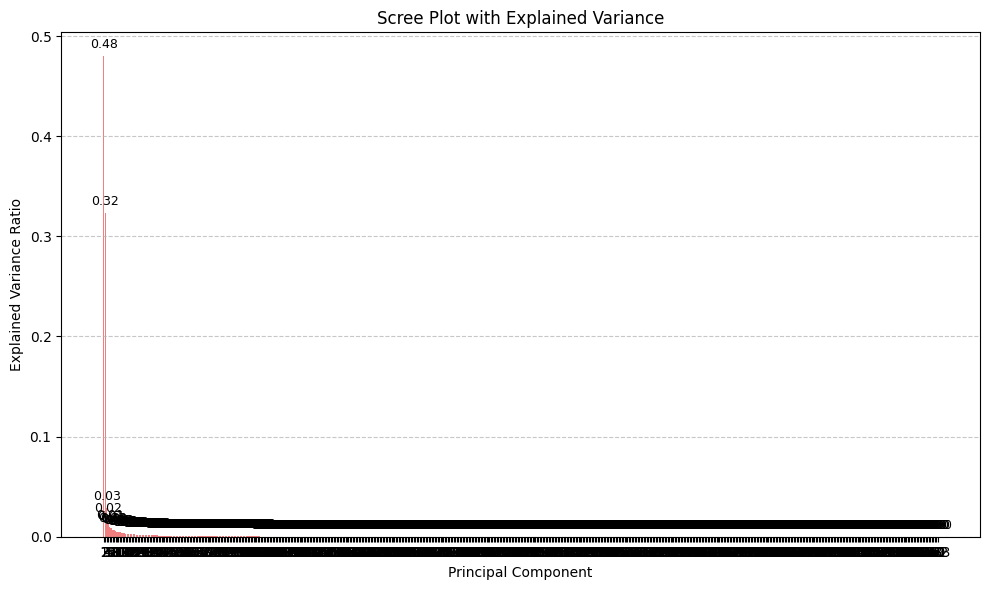

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume df contains only numeric columns and has been preprocessed
pca = PCA()
pca.fit(df)

explained_variance = pca.explained_variance_ratio_

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='lightcoral')

# Add number labels on top of each bar
for i, var in enumerate(explained_variance):
    plt.text(i + 1, var + 0.005, f"{var:.2f}", ha='center', va='bottom', fontsize=9)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot with Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


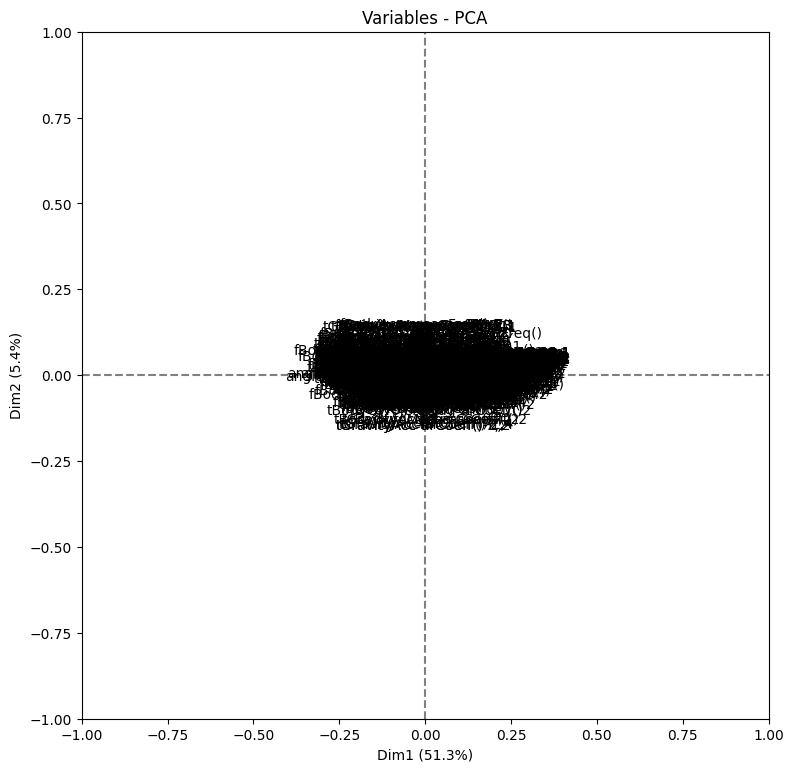

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize your data
X_scaled = StandardScaler().fit_transform(df)

# Run PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the loadings (variable contributions to PC1 and PC2)
loadings = pca.components_.T  # shape: (n_features, 2)
features = df.columns

# Create the PCA variable plot
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Plot arrows
for i in range(loadings.shape[0]):
    plt.arrow(0, 0,
              loadings[i, 0], loadings[i, 1],
              color='black', alpha=0.8, head_width=0.02)
    plt.text(loadings[i, 0] * 1.15,
             loadings[i, 1] * 1.15,
             features[i], color='black', ha='center', va='center')

# Axes labels
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Variables - PCA')
plt.grid(False)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()
